In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import wandb
import numpy as np

import matplotlib.pyplot as plt
from spd.nathu_dev_utils import download_final_causal_importance_arrays, get_experiment_df, safe_first, aggregate_over

In [16]:
from spd.registry import EXPERIMENT_REGISTRY

In [ ]:
import matplotlib.pyplot as plt
import re

def prettify_column_name(col_name: str) -> str:
    """Convert column names like 'summary.loss/faithfulness' to 'Faithfulness Loss'"""
    # Remove common prefixes
    name = re.sub(r'^(summary\.|config\.|metrics\.)', '', col_name)
    
    # Handle special patterns
    replacements = {
        'loss/': '',
        '_': ' ',
        '/': ' ',
        'stochastic recon': 'Stochastic Reconstruction',
        'total 0p2': 'Total (0.2)',
        'target solution error': 'Target Solution Error',
    }
    
    for old, new in replacements.items():
        name = name.replace(old, new)
    
    # Title case
    name = name.title()
    
    # Add "Loss" suffix if it was in the original but got removed
    if 'loss/' in col_name.lower() and 'Loss' not in name:
        name += ' Loss'
    
    return name

def plot_scatter_grid(df, x_col, y_cols, group_col='config.sigmoid_type', 
                      log_y_cols=None, figsize=None, title = ""):
    """Simple scatter plot grid with automatic prettification"""
    n_plots = len(y_cols)
    if figsize is None:
        figsize = (6 * n_plots, 6)
    
    if log_y_cols is None:
        # Auto-detect: use log scale for anything with "loss" in the name
        log_y_cols = [col for col in y_cols if 'loss' in col.lower()]
    
    fig, axes = plt.subplots(1, n_plots, figsize=figsize)
    if n_plots == 1:
        axes = [axes]
    
    x_label = prettify_column_name(x_col)
    
    for ax, y_col in zip(axes, y_cols):
        # Plot each group
        for group in df[group_col].unique():
            group_df = df[df[group_col] == group]
            ax.scatter(group_df[x_col], group_df[y_col], 
                      label=prettify_column_name(group), alpha=0.7)
        
        # Labels and formatting
        ax.set_xlabel(x_label)
        ax.set_ylabel(prettify_column_name(y_col))
        ax.set_title(f'{prettify_column_name(y_col)} vs {x_label}')
        
        if y_col in log_y_cols:
            ax.set_yscale('log')
            ax.set_ylabel(ax.get_ylabel() + ' (log scale)')
        
        ax.legend()
    
    fig.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

In [17]:
wandb_project = 'spd'
sweep_run_id = 'run_20250712_005612'

In [18]:
experiment_dfs = {}
for experiment_name in EXPERIMENT_REGISTRY.keys():
    experiment_dfs[experiment_name] = get_experiment_df(
        project=wandb_project,
        sweep_run_id=sweep_run_id,
        experiment_name=experiment_name,
        )

Processing resid_mlp3 runs: 100%|██████████| 20/20 [00:00<00:00, 14364.05it/s]


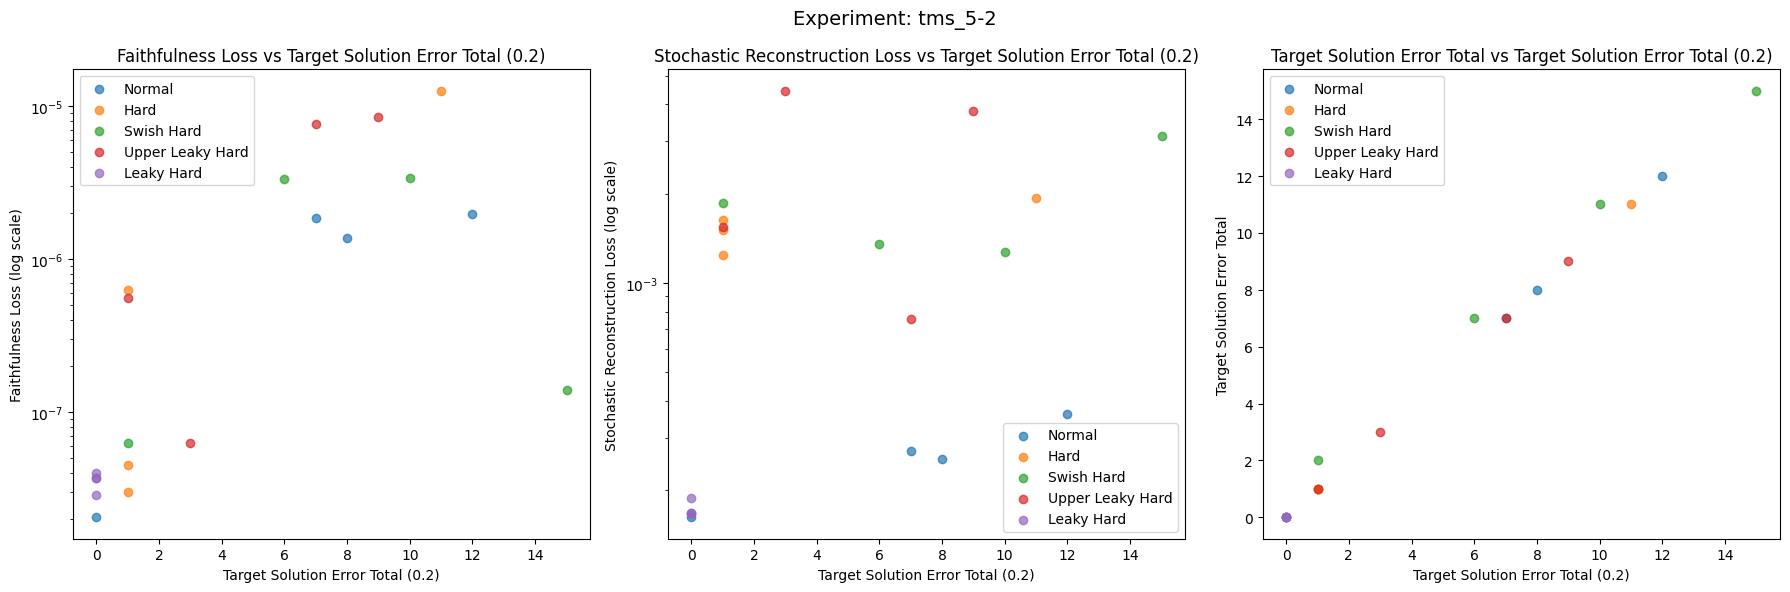

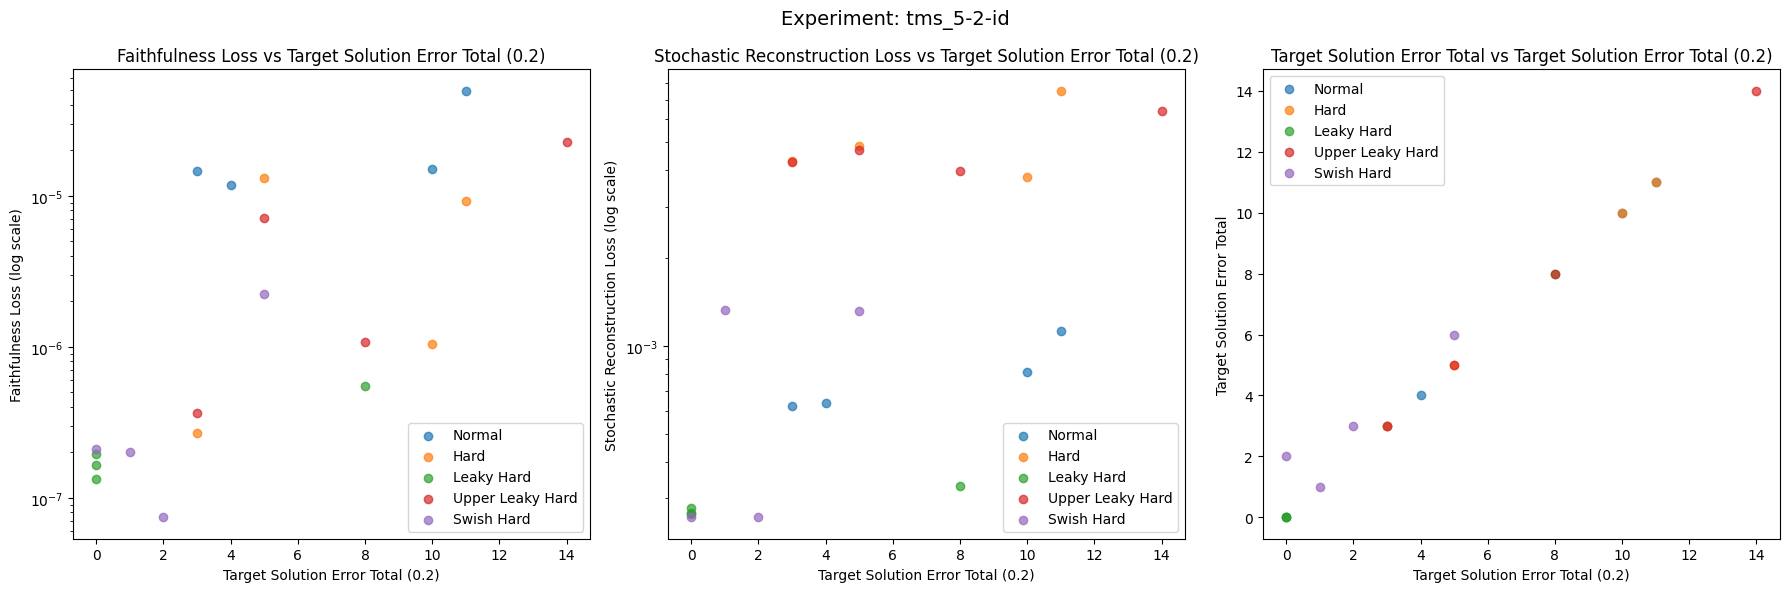

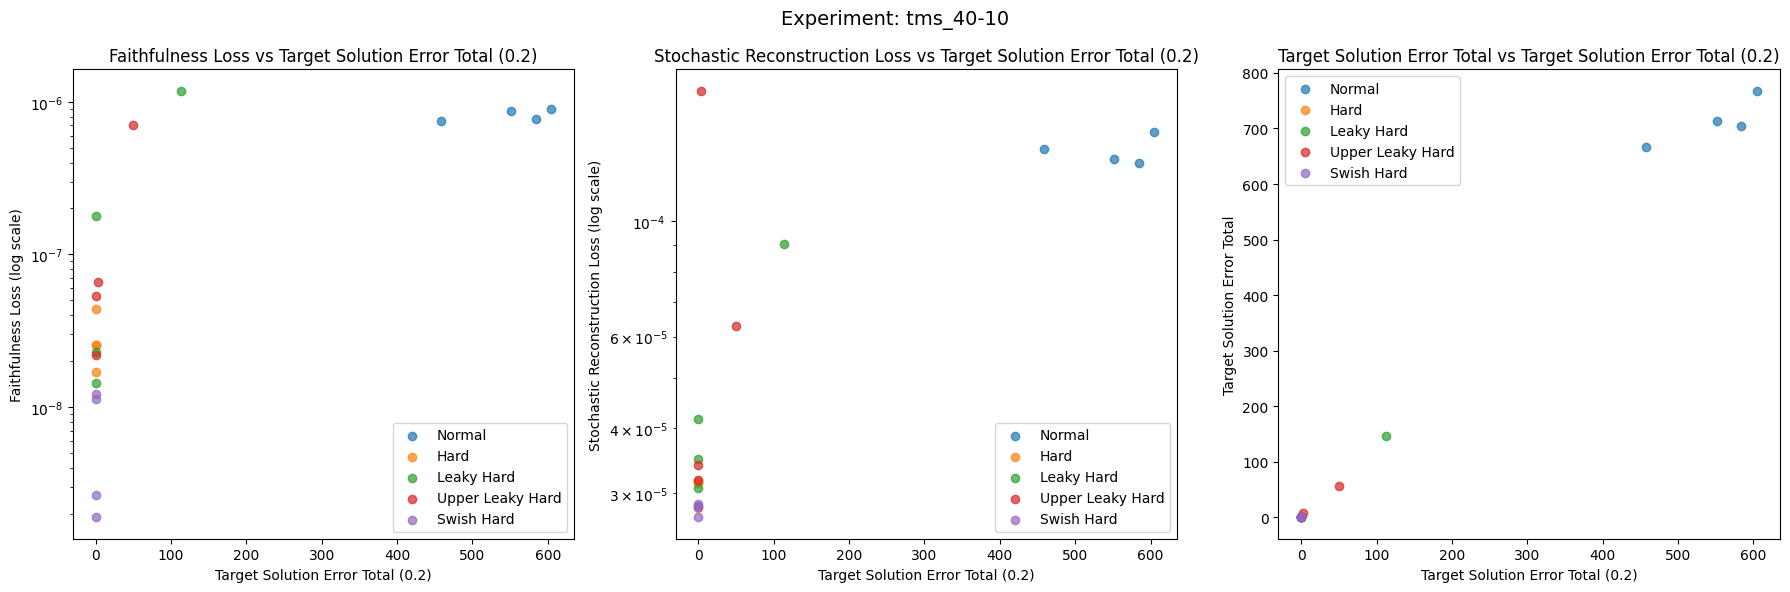

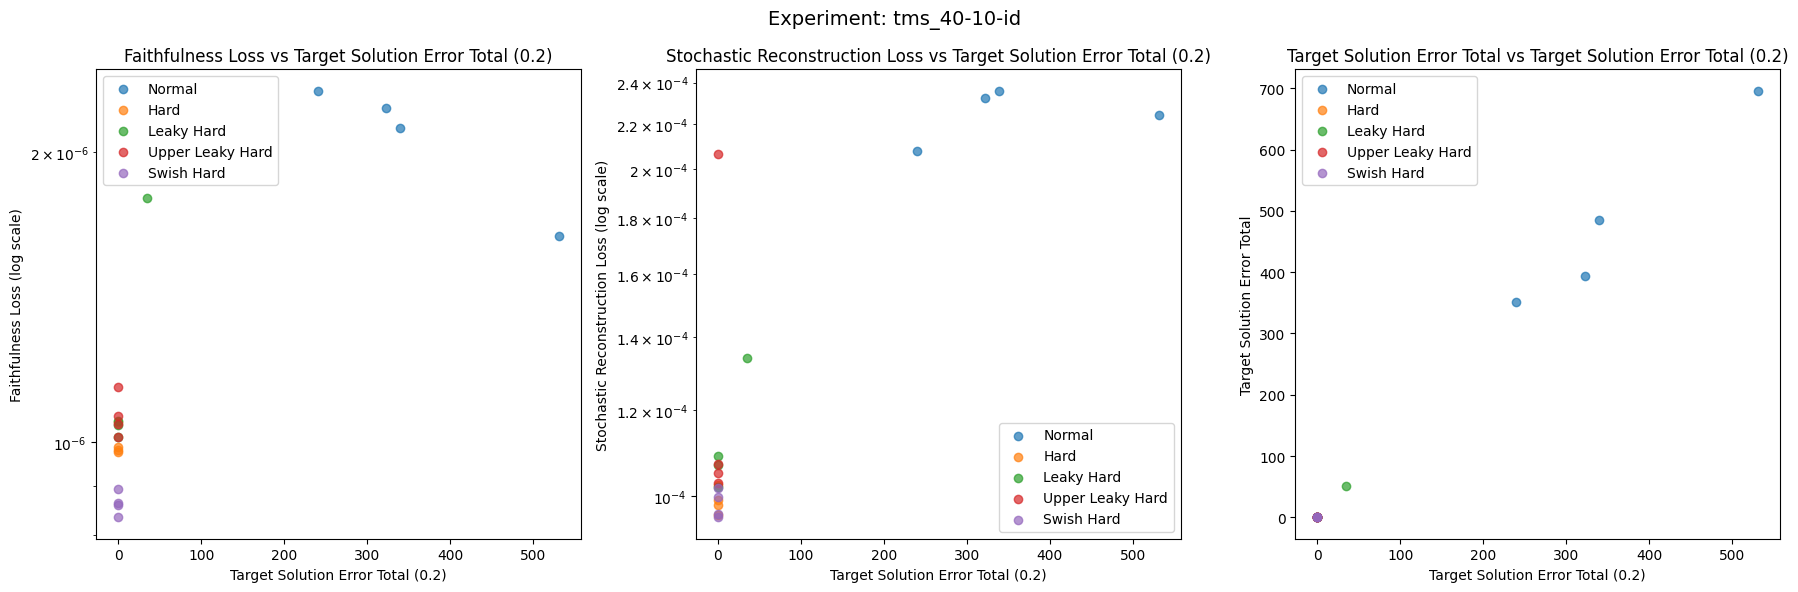

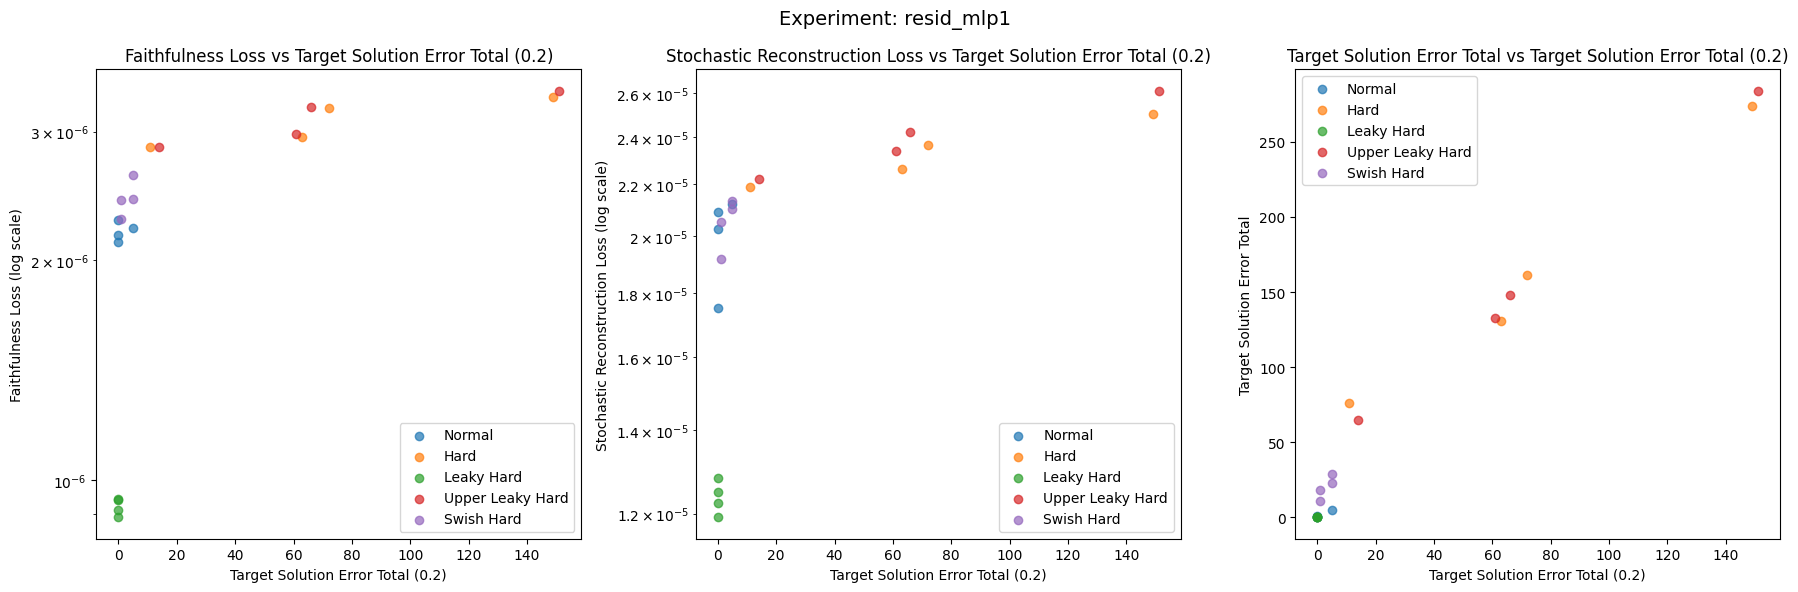

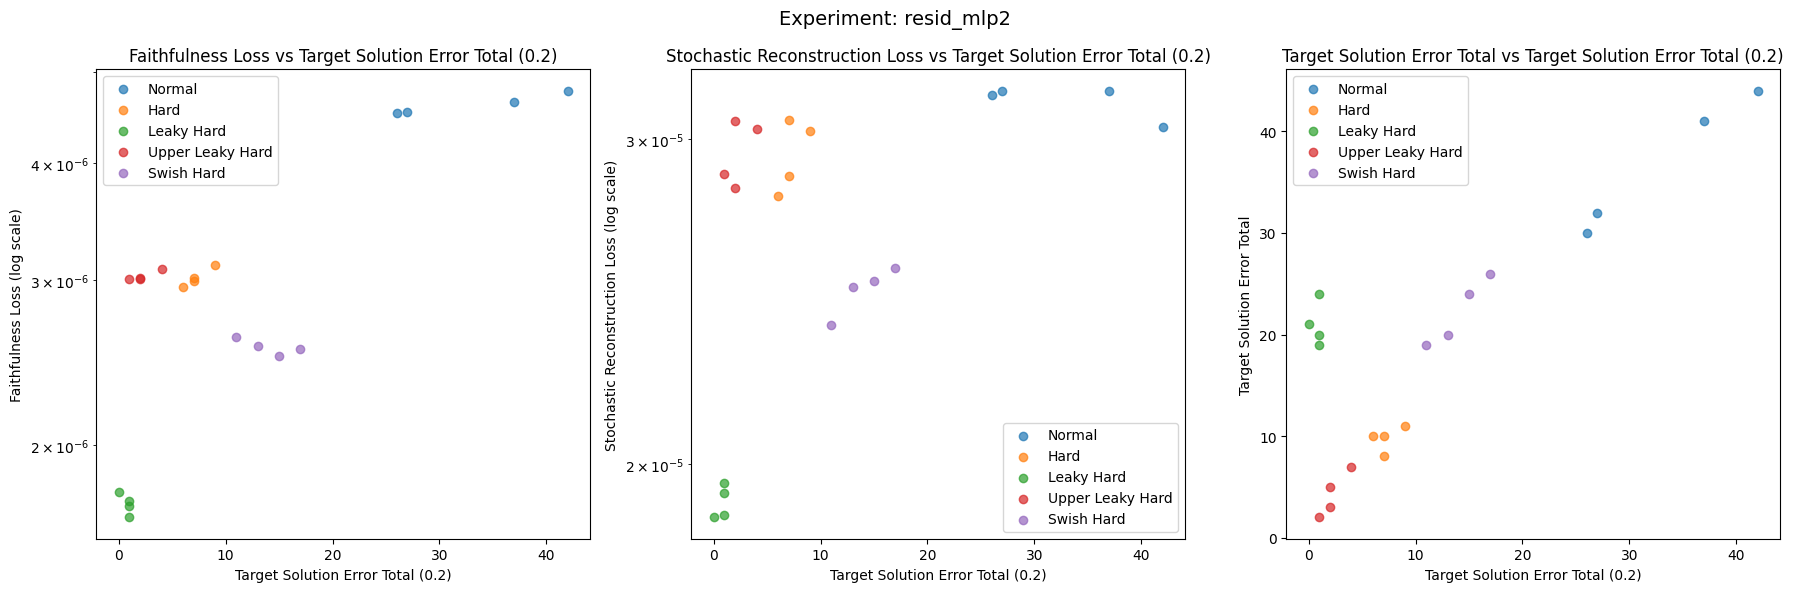

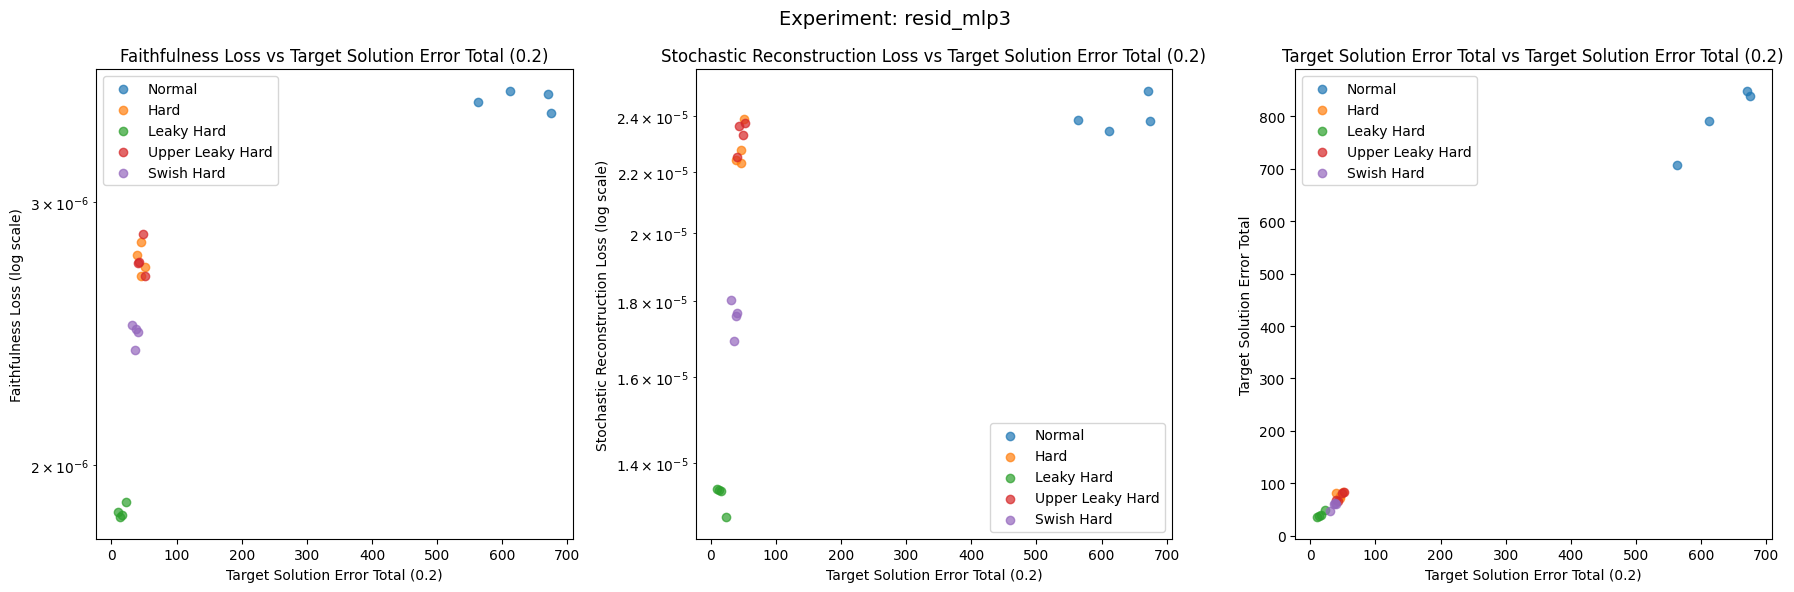

In [25]:
for experiment_name, df in experiment_dfs.items():
    # Usage - much simpler!
    plot_scatter_grid(
        df,
        x_col='summary.target_solution_error/total_0p2',
        y_cols=[
            'summary.loss/faithfulness',
            'summary.loss/stochastic_recon',
            'summary.target_solution_error/total'
        ], 
        title=f'Experiment: {experiment_name}',
        group_col='config.sigmoid_type'
    )

In [51]:
# Get list of columns that have any NA values
columns_with_na = agg_df.columns[agg_df.isna().any()].tolist()
columns_with_na

['wandb_run_id',
 'run_name',
 'config.embedding_recon_coeff',
 'config.lr_exponential_halflife',
 'config.pretrained_model_name_hf',
 'config.pretrained_model_output_attr',
 'config.recon_coeff',
 'config.recon_layerwise_coeff',
 'config.save_freq',
 'config.schatten_coeff',
 'config.tokenizer_name',
 'config.wandb_run_name',
 'summary.UV_matrices',
 'summary.arrays/layers.0.mlp_in/raw_ci_upper_leaky',
 'summary.arrays/layers.0.mlp_out/raw_ci_upper_leaky',
 'summary.arrays/layers.1.mlp_in/raw_ci_upper_leaky',
 'summary.arrays/layers.1.mlp_out/raw_ci_upper_leaky',
 'summary.causal_importances',
 'summary.causal_importances_upper_leaky',
 'summary.mask_vals_layers_0_mlp_in',
 'summary.mask_vals_layers_0_mlp_out',
 'summary.mask_vals_layers_1_mlp_in',
 'summary.mask_vals_layers_1_mlp_out',
 'summary.mean_component_activation_counts']

In [ ]:
optimize_over(agg_df,
              metric='summary.loss/faithfulness',
              params=['config.seed', 'config.learning_rate', 'config.weight_decay']
             )

In [18]:
dev_df.query('`summary.loss/faithfulness` < 0.1')

,wandb_run_id,run_name,state,tags,config.C,config.batch_size,config.embedding_recon_coeff,config.faithfulness_coeff,config.image_freq,config.image_on_first_step,...,summary.loss/total,summary.mask_vals_layers_0_mlp_in,summary.mask_vals_layers_0_mlp_out,summary.mask_vals_layers_1_mlp_in,summary.mask_vals_layers_1_mlp_out,summary.mean_component_activation_counts,summary.misc/grad_norm,summary.misc/lr,summary.misc/step,distance_from_solution
0,jkbsp44e,resid_mlp2_nmasks1_stochrecon1.00e+00_stochrec...,finished,"[resid_mlp, resid_mlp2, run_20250710_012029]",400,2048,None,1,5000,True,...,0.000025,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",0.000070,0.001,50000,2305
1,exwp2ijw,resid_mlp2_nmasks1_stochrecon1.00e+00_stochrec...,finished,"[resid_mlp, resid_mlp2, run_20250710_012029]",400,2048,None,1,5000,True,...,0.000096,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",0.000117,0.001,50000,25
2,dld2obae,resid_mlp2_nmasks1_stochrecon1.00e+00_stochrec...,finished,"[resid_mlp, resid_mlp2, run_20250710_012029]",400,2048,None,1,5000,True,...,0.000053,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",0.000089,0.001,50000,791
3,jhbmnudo,resid_mlp2_nmasks1_stochrecon1.00e+00_stochrec...,finished,"[resid_mlp, resid_mlp2, run_20250710_012029]",400,2048,None,1,5000,True,...,0.000168,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",0.000122,0.001,50000,29
4,rwvxguu5,resid_mlp2_nmasks1_stochrecon1.00e+00_stochrec...,finished,"[resid_mlp, resid_mlp2, run_20250710_012029]",400,2048,None,1,5000,True,...,0.000301,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",0.000157,0.001,50000,32
5,4awest7o,resid_mlp2_nmasks1_stochrecon1.00e+00_stochrec...,finished,"[resid_mlp, resid_mlp2, run_20250710_012029]",400,2048,None,1,5000,True,...,0.000028,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",0.000076,0.001,50000,2234
6,e9h8sw3q,resid_mlp2_nmasks1_stochrecon1.00e+00_stochrec...,finished,"[resid_mlp, resid_mlp2, run_20250710_012029]",400,2048,None,1,5000,True,...,0.000068,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",0.000097,0.001,50000,740
7,v03l6npo,resid_mlp2_nmasks1_stochrecon1.00e+00_stochrec...,finished,"[resid_mlp, resid_mlp2, run_20250710_012029]",400,2048,None,1,5000,True,...,0.000204,"{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...","{'_type': 'image-file', 'format': 'png', 'heig...",0.000144,0.001,50000,202
8,70k6ludq,resid_mlp2_nmasks1_

In [6]:
import json

def get_constant_columns(df):
    """Get columns that have a single unique value across all rows."""
    boring_columns = []
    for c in df.columns:
        if c.startswith('config'):
            try:
                # Try the normal unique() first for efficiency
                if df[c].unique().size == 1:
                    boring_columns.append(c)
            except TypeError:
                # For non-hashable types, convert to JSON strings
                try:
                    json_values = df[c].apply(lambda x: json.dumps(x, sort_keys=True))
                    if json_values.nunique() == 1:
                        boring_columns.append(c)
                except (TypeError, ValueError):
                    # If JSON serialization fails, skip the column
                    pass
    return boring_columns

In [ ]:
simplified_df = df.drop(columns=get_constant_columns(df))

In [30]:
loss_terms = ['summary.loss/faithfulness',  'summary.loss/importance_minimality',
       'summary.loss/output_recon', 'summary.loss/stochastic_recon',
       'summary.loss/stochastic_recon_layerwise', 'summary.loss/total', 'distance_from_solution']

partition_hparam = 'pnorm'
aggregation_hparm = 'seed'
varying_features = get_varying_columns(simplified_df, prefix='config', blacklist=[f'config.{aggregation_hparm}', f'config.{partition_hparam}'])


In [31]:
for partition_hparam_value in simplified_df[f'config.{partition_hparam}'].unique():
    print(f"Analyzing partition: {partition_hparam_value}")
    partition_df = simplified_df[simplified_df[f'config.{partition_hparam}'] == partition_hparam_value]
    grouped_df = partition_df.groupby(varying_features)[loss_terms].mean()
    break

Analyzing partition: 2


In [32]:
grouped_df

,summary.loss/faithfulness,summary.loss/importance_minimality,summary.loss/output_recon,summary.loss/stochastic_recon,summary.loss/stochastic_recon_layerwise,summary.loss/total,distance_from_solution
config.importance_minimality_coeff,,,,,,,
0.000001,3.801066e-07,18.586742,0.000008,0.000004,0.000001,0.000025,2203.000000
0.000003,1.880654e-06,10.143078,0.000054,0.000015,0.000005,0.000053,801.666667
0.000010,4.607342e-06,4.786532,0.000122,0.000031,0.000011,0.000095,28.333333
0.000030,7.850378e-06,2.793333,0.000203,0.000057,0.000019,0.000168,26.666667
0.000100,2.136488e-05,1.196013,0.000418,0.000114,0.000044,0.000298,40.333333


In [104]:
solution.compute_distance_from(df['ci_masks'][0])

35

In [ ]:
ci_values = df['ci_masks'][0]['linear1']
distance_from_identity(ci_values, tolerance=0.1, permute=True)

plt.imshow(ci_values, cmap='Reds', vmin=0, vmax=1)

5

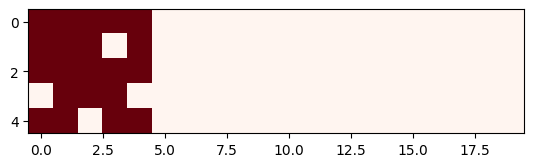

In [ ]:
ci_values = df['ci_masks'][0]['hidden_layers.0']

plt.imshow(ci_values, cmap='Reds', vmin=0, vmax=1)


In [ ]:
tolerance=0.1
k = 4
ci_values = df['ci_masks'][0]['hidden_layers.0']

distance_from_k_columns(ci_values,k=k,  tolerance=tolerance, )

4

In [ ]:
(np.partition(column_sums, kth=-k)[:-k]).sum().item

0

In [ ]:
def distance_from_k_columns(ci_values, k, tolerance=0.1):
    ci_values = np.clip(ci_values, 0.0, 1.0)
    column_sums = (ci_values > tolerance).sum(axis=0) # count of non-zero elements in each column
    # the k largest column sums are out "alive" columns, we compute the sum over the rest
    return (np.partition(column_sums, kth=-k)[:-k]).sum().item()